In [167]:
import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('classic')

In [4]:
def graficarVectores(vecs, cols, alpha =1):
    plt.axvline(x = 0, color="grey", zorder = 0)
    plt.axhline(y = 0, color="grey", zorder = 0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles= "xy",
                   scale_units="xy",
                   scale = 1,
                   alpha = alpha,
                   color = cols[i]
                  )

In [ ]:
# AutoValores y AutoVector
# 
# AutoVector: Queremos encontrar un vector que cuando lo multiplicamos por una matriz no sufre ninguna transformación
# pero si que puede estar multiplicado por el AutoValor, lo que puede ser que este sea más grande

In [8]:
X = np.array([[3,2],[4,1]])
X

array([[3, 2],
       [4, 1]])

In [10]:
v = np.array([[1],[1]])
v

array([[1],
       [1]])

In [12]:
# El vector transformado lo calculamos con:
u = X.dot(v)
u

array([[5],
       [5]])

(-1.0, 6.0)

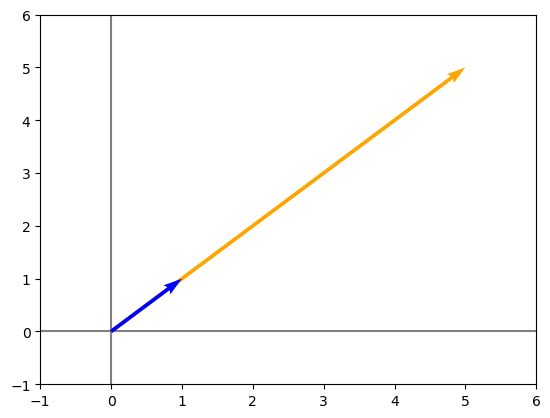

In [14]:
graficarVectores([u.flatten(), v.flatten()], cols=["orange", "blue"])

plt.xlim(-1,6)
plt.ylim(-1,6)

In [16]:
# Nuestro autovalor es 5

lambda_1 = 5
lambda_1 * v 

array([[5],
       [5]])

In [20]:
# Podemos tener otro autovalor:
s = np.array([[-1],[2]])
t = X.dot(s)
t

array([[ 1],
       [-2]])

(-3.0, 3.0)

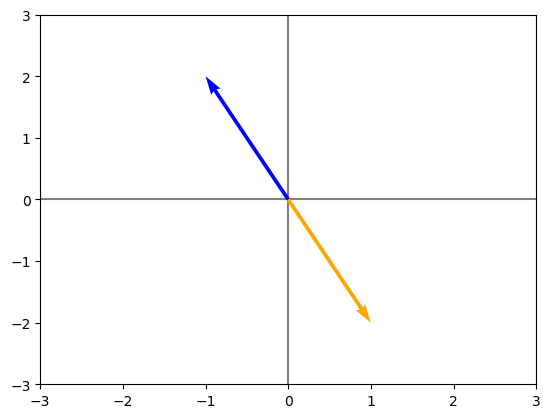

In [22]:
graficarVectores([t.flatten(),s.flatten()], cols = ["orange", "blue"])
plt.xlim(-3,3)
plt.ylim(-3,3)

In [ ]:
# Con esto vemos que una matriz de 2x2 tiene dos autovectores con dos autovalores asociados

In [ ]:
# CÓMO CALCULAR LOS AUTOVALORES Y LOS AUTOVECTORES

In [44]:
X = np.array([[3,2],[4,1]])
# Calculo de autovectores y autovalores
autovalores, autovectores = la.eig(X)

In [38]:
autovalores

array([ 5., -1.])

In [48]:
autovectores[0]

array([ 0.70710678, -0.4472136 ])

In [50]:
autoovectores[1]

array([0.70710678, 0.89442719])

(-7.0, 3.0)

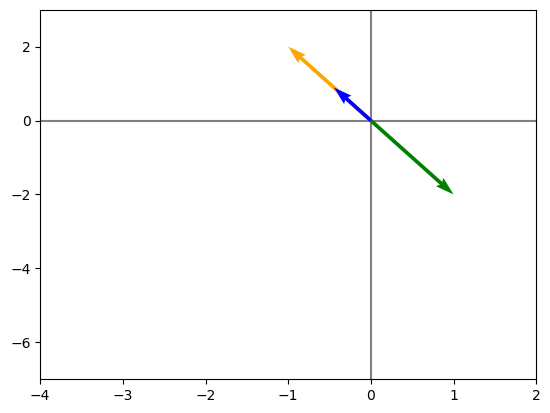

In [54]:
v = np.array([[-1],[2]])
Xv = X.dot(v)
v_np = autoovectores[:,1]

graficarVectores([Xv.flatten(), v.flatten(), v_np], cols = ["green", "orange", "blue"])
plt.xlim(-4,2)
plt.ylim(-7,3)

# Son el mismo pero lo que cambia es el autovalor asociado

In [ ]:
# DESCOMPONER UNA MATRIZ - SIENDO UNA MATRIZ CUADRADA
# Encontrar dos o mas matrices que me ayuden a encontrar mi matriz original y que tengan ciertas propiedades
# A = [matriz autovectores] * [matriz diagonal de lambda] * [matriz autovectores]^-1
# Renombre de la fórmula
# A = v(matriz autovectores) * diagonal lamba * v(matriz autovectores)^-1

In [60]:
A = np.array([[3,2], [4,1]])
A

array([[3, 2],
       [4, 1]])

In [62]:
autovalores, autovectores = la.eig(A)

In [66]:
print(autovalores)
print(autovectores)

[ 5. -1.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [68]:
A_calc = autovectores.dot(np.diag(autovalores)).dot(la.inv(autovectores))
A_calc

array([[3., 2.],
       [4., 1.]])

In [ ]:
# Si nos damos cuenta hemos sido capaces de expresarla de la misma manera que antes

In [ ]:
# Por otra parte, hay otro tipo de descomposición en el caso de que:
# A == A^T
# Esto es que la matriz es simetrica
# Entonces podemos aplicar esta descomposición:
# A = v(matriz autovectores) * diagonal lamba * v(matriz autovectores)^T
# Computacionalmente es más interesante

In [72]:
A = np.array([[3,2],[2,3]])
A == A.T

array([[ True,  True],
       [ True,  True]])

In [74]:
autovalores, autovectores = la.eig(A)

In [76]:
autovalores

array([5., 1.])

In [78]:
autovectores

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [84]:
A_calc = (autovectores.dot(np.diag(autovalores))).dot(autovectores.T)
A_calc

array([[3., 2.],
       [2., 3.]])

In [88]:
A

array([[3, 2],
       [2, 3]])

In [ ]:
# DESCOMPONER UNA MATRIZ NO CUADRADA
# Debemos utilizar el método de la descomposición en valores singulares (SVD)
# Tenemos las siguientes matrices
# U -> es ortogonal -> tenemos los vectores izquierdos singulares
# V -> es ortogonal -> tiene los vectores derechos singulares
# D -> es diagonal -> pero tiene en su diagonal todos los valores singulares y tiene 0s fuera de la diagonlaA
# * no tienen porque tener las mismas dimensiones

In [92]:
A = np.array([[1,2,3],[3,4,5]])
A

array([[1, 2, 3],
       [3, 4, 5]])

In [94]:
U , D, V = la.svd(A)

In [96]:
U

array([[-0.46410668,  0.88577931],
       [-0.88577931, -0.46410668]])

In [98]:
D

array([7.97638869, 0.61418515])

In [100]:
V

array([[-0.39133557, -0.5605708 , -0.72980603],
       [-0.8247362 , -0.13817999,  0.54837623],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [ ]:
# TRES TRANSFORMACIONES

In [127]:
def graficarMatriz(matriz, vectorCol=['red', 'blue']):
    #circulo unitario
    x = np.linspace(-1,1, 100000)
    y = np.sqrt(1-(x**2))
    #circulo unitario transformado
    x1 = matriz[0,0]*x + matriz[0,1]*y
    y1 = matriz[1,0]*x + matriz[1,1]*y
    x1_neg = matriz[0,0]*x - matriz[0,1]*y
    y1_neg = matriz[1,0]*x - matriz[1,1]*y
    #vectores
    u1 = [matriz[0,0], matriz[1,0]]
    v1 = [matriz[0,1], matriz[1,1]]
    
    graficarVectores([u1, v1], cols=[vectorCol[0], vectorCol[1]])
    plt.plot(x1, y1, 'green', alpha = 0.7)
    plt.plot(x1_neg, y1_neg, 'green', alpha = 0.7)

In [121]:
A = np.array([[3,7], [5,2]])
A

array([[3, 7],
       [5, 2]])

Circulo unitario:


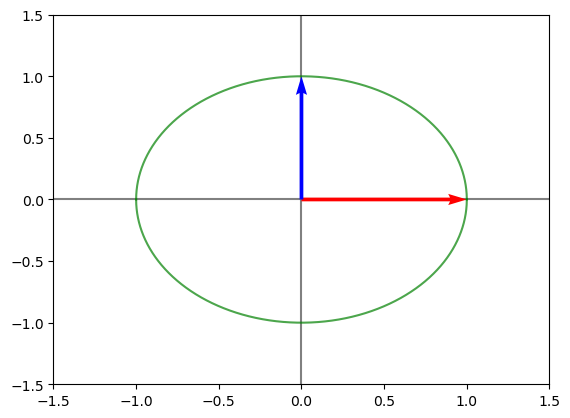

Circulo transformado:


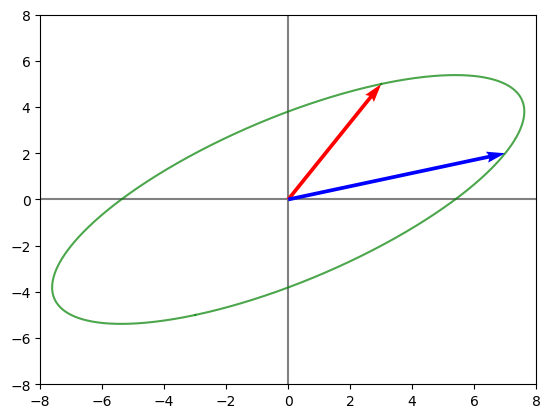

In [139]:
print("Circulo unitario:")
graficarMatriz(np.array([[1,0],[0,1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print("Circulo transformado:")
graficarMatriz(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Circulo unitario:


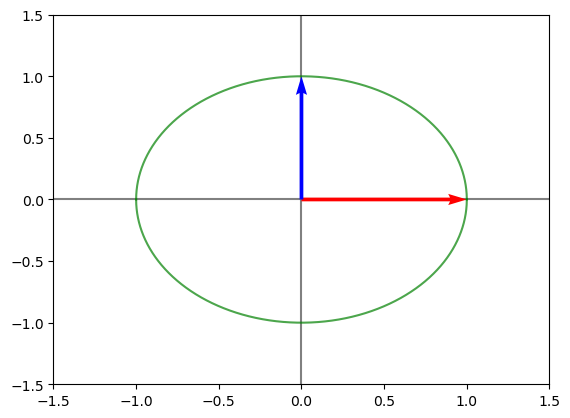

Primera rotación (V):


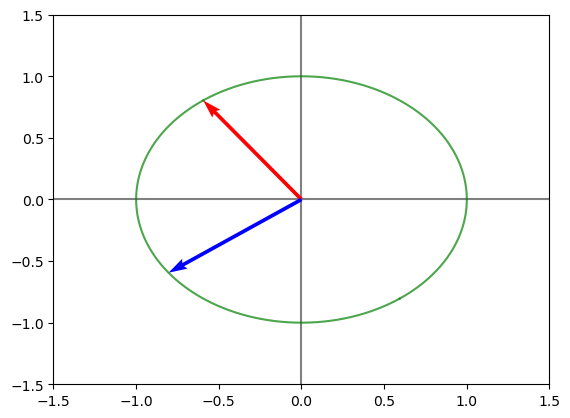

Escala (D):


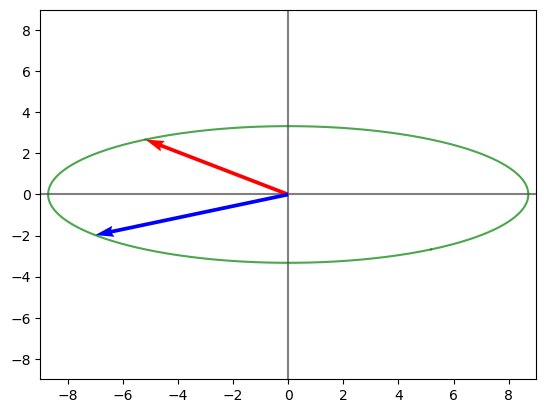

Segunda rotación (U):


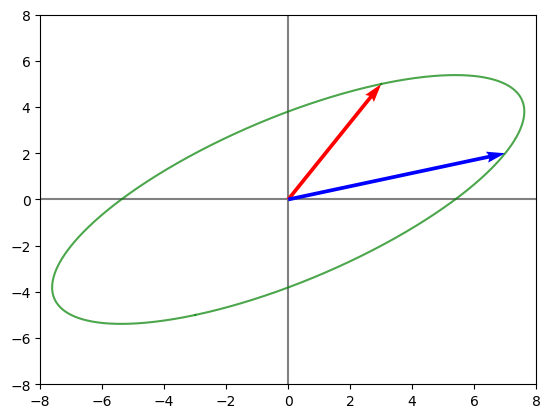

In [145]:
# Aplicación de las matrices D, V, U y su efecto en la transformación
U, D, V = la.linalg.svd(A)

print("Circulo unitario:")
graficarMatriz(np.array([[1,0],[0,1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print("Primera rotación (V):")
graficarMatriz(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print("Escala (D):")
graficarMatriz(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print("Segunda rotación (U):")
graficarMatriz(U.dot(np.diag(D).dot(V)))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()



In [ ]:
# ¿Cómo interprettar los valores singulares?

In [147]:
A = np.array([[3,7], [5,2]])
A

array([[3, 7],
       [5, 2]])

In [149]:
U, D, V = np.linalg.svd(A)
print(D[0])
print(D[1])

8.7133796929634
3.3282148858288965


In [155]:
u1 = [D[0] * U[0,0] , D[0]*U[0,1]]
v1 = [D[1] * U[1,0] , D[1]*U[1,1]]

print(A[0,0], A[1,0])
print(u1)
print()
print(A[0,1], A[1,1])
print(v1)

3 5
[-7.412043479297569, -4.580894796297923]

7 2
[-1.7497461132982814, 2.8311486829996433]


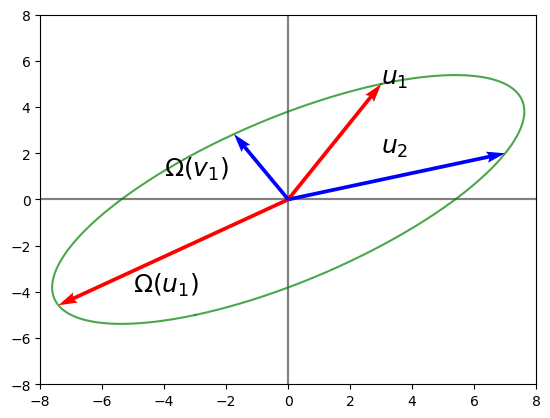

In [161]:
graficarMatriz(A)
graficarVectores([u1, v1], cols=["red", "blue"])
plt.text(3, 5, r"$u_1$", size = 18)
plt.text(3, 2, r"$u_2$", size = 18)

plt.text(-5, -4, r"$\Omega(u_1)$", size = 18)
plt.text(-4, 1, r"$\Omega(v_1)$", size = 18)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# D está teniendo un efecto distinto en cada uno de los ejes

In [ ]:
# UNA IMAGEN ES UNA MATRIZ

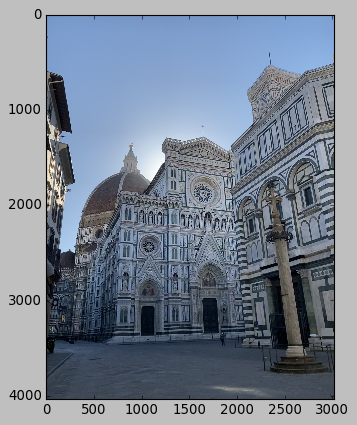

In [169]:
imagen = Image.open("./firenze.png")

plt.imshow(imagen)

In [171]:
imagen_gr = imagen.convert("LA")
print(imagen_gr)

<PIL.Image.Image image mode=LA size=3024x4032 at 0x1BED9851450>


In [173]:
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)
imagen_mat

array([145., 145., 144., ...,  75.,  75.,  76.])

In [175]:
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])
imagen_mat

array([[145., 145., 144., ..., 155., 155., 155.],
       [145., 145., 145., ..., 155., 155., 155.],
       [145., 145., 145., ..., 155., 155., 155.],
       ...,
       [ 64.,  65.,  65., ...,  74.,  74.,  74.],
       [ 65.,  65.,  66., ...,  74.,  75.,  75.],
       [ 65.,  65.,  66., ...,  75.,  75.,  76.]])

In [177]:
#4032 pixeles x 3024 pixeles
imagen_mat.shape

(4032, 3024)

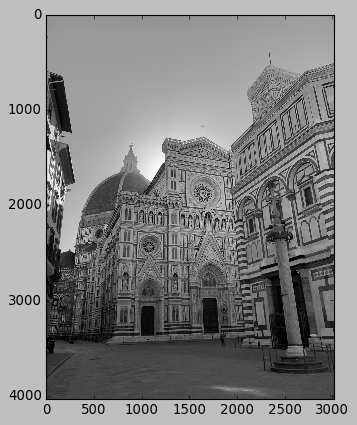

In [181]:
plt.imshow(imagen_mat, cmap="gray")

In [185]:
imagen_mat_2 = imagen_mat / 10
imagen_mat_2

array([[14.5, 14.5, 14.4, ..., 15.5, 15.5, 15.5],
       [14.5, 14.5, 14.5, ..., 15.5, 15.5, 15.5],
       [14.5, 14.5, 14.5, ..., 15.5, 15.5, 15.5],
       ...,
       [ 6.4,  6.5,  6.5, ...,  7.4,  7.4,  7.4],
       [ 6.5,  6.5,  6.6, ...,  7.4,  7.5,  7.5],
       [ 6.5,  6.5,  6.6, ...,  7.5,  7.5,  7.6]])

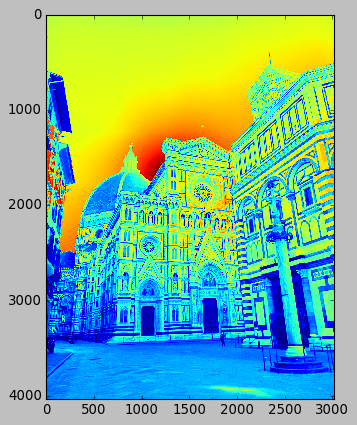

In [189]:
plt.imshow(imagen_mat_2)

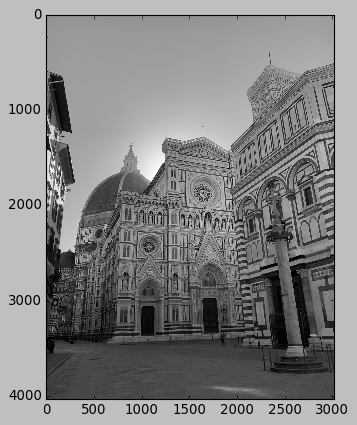

In [191]:
plt.imshow(imagen_mat_2, cmap="gray")

In [193]:
print(np.max(imagen_mat_2))
print(np.max(imagen_mat))

25.5
255.0


In [195]:
print(np.min(imagen_mat_2))
print(np.min(imagen_mat))

0.0
0.0


In [197]:
# Como aplicamos la descomposición SVD a una imagen
U, D, V = np.linalg.svd(imagen_mat)

In [199]:
print(imagen_mat.shape)
print(U.shape)
print(D.shape)
print(V.shape)

(4032, 3024)
(4032, 4032)
(3024,)
(3024, 3024)


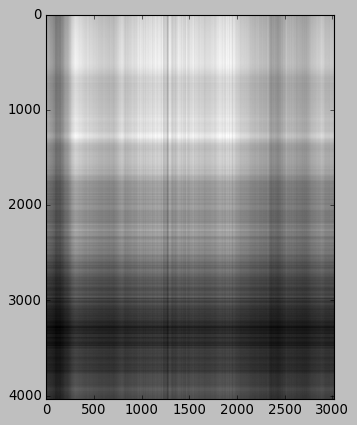

In [205]:
imagen_recons = np.matrix(U[:,:1]) * np.diag(D[:1]) * np.matrix(V[:1,:])

plt.imshow(imagen_recons, cmap="gray")

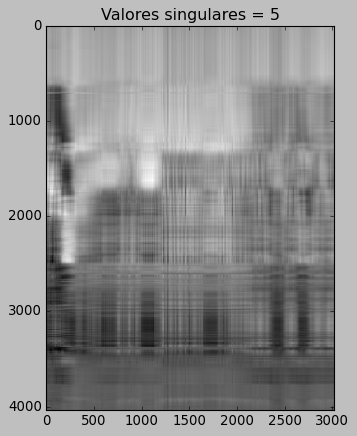

In [209]:
i= 5
imagen_recons = np.matrix(U[:,:i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
title = "Valores singulares = %s" %i
plt.title(title)
plt.imshow(imagen_recons, cmap="gray")

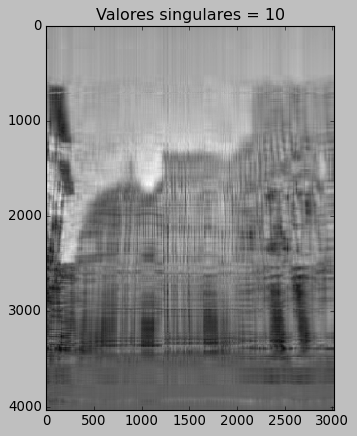

In [211]:
i= 10
imagen_recons = np.matrix(U[:,:i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
title = "Valores singulares = %s" %i
plt.title(title)
plt.imshow(imagen_recons, cmap="gray")

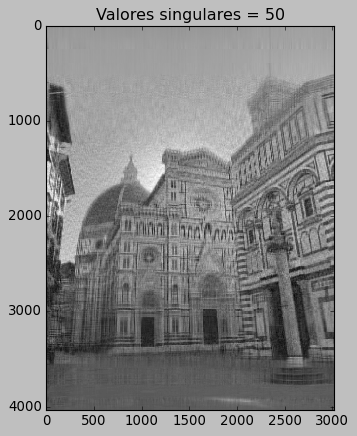

In [213]:
i= 50
imagen_recons = np.matrix(U[:,:i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
title = "Valores singulares = %s" %i
plt.title(title)
plt.imshow(imagen_recons, cmap="gray")

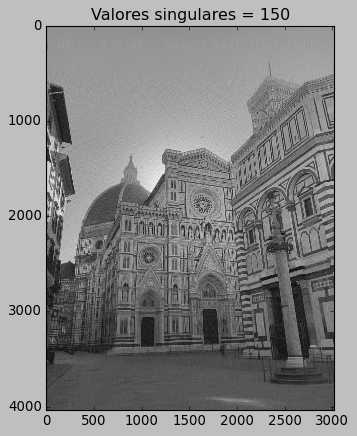

In [217]:
i= 150
imagen_recons = np.matrix(U[:,:i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
title = "Valores singulares = %s" %i
plt.title(title)
plt.imshow(imagen_recons, cmap="gray")

In [ ]:
# PSEUDOINVERSA  DE MOORE PENROSE 
# A*x = b
# Si existe A^-1 -> x=A^-1*b

# Podemos buscar la pseudoinversa
# A*Apse = apoximadamente la identidad
# Apse = V*Dpse**U.T
# Con esto obtenemos una matriz que al multiplicarla por la original obtenemos algo cercano a la identidad

In [265]:
np.set_printoptions(suppress=True) # para que no nos muestre los cercanos a 0

In [267]:
A = np.array([[2,3], [5,7], [11,3]])
# en caso de existir es unica

In [269]:
U, D, V = la.svd(A)

In [219]:
U

array([[-0.01954581, -0.01058027, -0.01362399, ...,  0.03114275,
        -0.0357623 ,  0.01386621],
       [-0.01954648, -0.01058257, -0.01363768, ...,  0.03136914,
         0.01121667, -0.00597464],
       [-0.01955017, -0.01057629, -0.01362649, ..., -0.01060566,
         0.00931775,  0.02989112],
       ...,
       [-0.00975495, -0.0042498 , -0.00452334, ...,  0.32697351,
        -0.05144005, -0.07258794],
       [-0.00974537, -0.00426042, -0.00463872, ..., -0.0678466 ,
         0.32217156, -0.07442192],
       [-0.00974268, -0.00421968, -0.00470711, ..., -0.057919  ,
        -0.05848534,  0.27389954]])

In [223]:
D

array([8.71337969, 3.32821489])

In [225]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

In [ ]:
# Para calcular -Dspse

In [271]:
D_pse = np.zeros((A.shape[0], A.shape[1])).T
D_pse

array([[0., 0., 0.],
       [0., 0., 0.]])

In [273]:
print("Valores a reemplazar en D_pse")
print(D_pse[:D.shape[0], :D.shape[0]])

Valores a reemplazar en D_pse
[[0. 0.]
 [0. 0.]]


In [275]:
print("Valores que pondremos en D_pse")
print(la.inv(np.diag(D)))

Valores que pondremos en D_pse
[[0.07191779 0.        ]
 [0.         0.20559644]]


In [277]:
print("D_pse:")
D_pse[:D.shape[0], :D.shape[0]] = la.inv(np.diag(D))
print(D_pse)

D_pse:
[[0.07191779 0.         0.        ]
 [0.         0.20559644 0.        ]]


In [279]:
A_pse = V.T.dot(D_pse).dot(U.T)
print(A_pse)

[[-0.01923918 -0.04000875  0.11259292]
 [ 0.06602536  0.14866638 -0.07958024]]


In [281]:
# Nos devuelve lo mismo que el proceso anterior
A_pse_calc = la.pinv(A)
A_pse_calc

array([[-0.01923918, -0.04000875,  0.11259292],
       [ 0.06602536,  0.14866638, -0.07958024]])

In [283]:
print(A_pse.dot(A))

[[1. 0.]
 [0. 1.]]


In [ ]:
# np.set_printoptions(suppress=False)

In [287]:
A_pse_2 = la.inv(A.T.dot(A)).dot(A.T)
A_pse_2

array([[-0.01923918, -0.04000875,  0.11259292],
       [ 0.06602536,  0.14866638, -0.07958024]])